<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# MNIST 
</div>

Dans ce projet, nous utiliserons l'ensemble de données **MNIST**, qui est un ensemble de 70 000 petites images de chiffres écrits à la main par des lycéens et des employés du Bureau américain du recensement.        
Chaque image est étiquetée avec le chiffre qu'elle représente.    
Cet ensemble a été tellement étudié qu'il est souvent appelé le "hello world" de Apprentissage automatique : chaque fois que les gens proposent une nouvelle classification algorithme, ils sont curieux de voir comment il fonctionnera sur **MNIST**, et toute personne qui apprend l'apprentissage automatique s'attaque à cet ensemble de données tôt ou tard.   
**Scikit-Learn** fournit de nombreuses fonctions d'assistance pour télécharger des ensembles de données populaires.     
Le MNIST en fait partie. https://www.kaggle.com/c/digit-recognizer     
https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_MNIST     


Avant de commancer le projet essayez de voir les cours et faire les travaux pratiques SVM.
http://cedric.cnam.fr/vertigo/cours/ml2/      

C'est un projet de classification, alors utiliser par exemple les modèles de Machine Learning de la librairie **scikit-learn** suivant: https://scikit-learn.org/stable/supervised_learning.html    

* LogisticRegression
* KNN
* SVC :
  * https://scikit-learn.org/stable/modules/svm.html#classification
  * http://cedric.cnam.fr/vertigo/cours/ml2/tpSVMLineaires.html
  * http://cedric.cnam.fr/vertigo/cours/ml2/tpMethodesNoyaux.html#machines-a-vecteurs-de-support-svm


Essayer de définir et comprendre les mots clefs de chaque algorithme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mnist_function import *
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import time
from collections import defaultdict

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Chargement des données
</div>

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- La clé **DESCR** décrivant le jeu de données

- La clé **data** contenant un tableau avec une ligne par instance et une colonne par caractéristique

- La clé **target** contenant un tableau avec les étiquettes

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Exploration des données
</div>

Voir le site officiel : http://yann.lecun.com/exdb/mnist/

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.frame

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel781  pixel782  pixel783  pixel784  class  
0           0.0       0.0       0.0       0.0      5  
1           0.0       0.0       0.0       0.0      0  
2           0.0       0.0       0.0       0.0      4  
3           0.0       0.0       0.0       0.0      1  
4           0.0       0.0       0.0       0.0      9  
...         ...       ...       ...       ...    ...  
69995       0.0       0.0       0.0       0.0      2  
69996       0.0       0.0       0.0       0.0      3  
69997       0.0       0.0       0.0       0.0      4  
69998       0.0       0.0       0.0       0.0      5  
69999       0.0       0.0       0.0       0.0      6  

[70000 rows x 785 columns]

In [6]:
mnist.frame.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)

In [7]:
# Target = class
mnist.frame['class']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. X et Y
</div>

In [5]:
X, y = mnist["data"], mnist["target"]

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Analyse si nettoyage ou non
</div>

In [12]:
print(f"X nan:{X.isna().sum().sum()} et Y nan:{y.isna().sum().sum()}")

X nan:0 et Y nan:0


In [13]:
X.describe(include="all")

pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      4.256304      2.783732   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

           pixel778      pixel779      pixel780  pixel781  pixel782  pixel783  \
count  70000.000000  70000.000000  70000.000000   70000.0   70000.0   70000.0   
mean       0.016614      0.012957      0.001714       0.0       0.0       0.0   
std        1.561822      1.553796      0.320889       0.0       0.0       0.0   
min        0.000000      0.000000      0.000000       0.0       0.0       0.0   
25%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
50%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
75%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
max      253.000000    254.000000     62.000000       0.0       0.0       0.0   

       pixel784  
count   70000.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 784 columns]

In [14]:
X_reduce = X.copy()

In [15]:
X_reduce = X_reduce.drop(columns=['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12'], axis=1)

In [16]:
X_reduce.describe(include="all")

pixel13       pixel14       pixel15       pixel16  pixel17  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.0   
mean       0.001800      0.006714      0.003086      0.000129      0.0   
std        0.440064      1.260218      0.816403      0.034017      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        0.000000      0.000000      0.000000      0.000000      0.0   
max      116.000000    254.000000    216.000000      9.000000      0.0   

       pixel18  pixel19  pixel20  pixel21  pixel22  ...      pixel775  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  ...  70000.000000   
mean       0.0      0.0      0.0      0.0      0.0  ...      0.197414   
std        0.0      0.0      0.0      0.0      0.0  ...      5.991206   
min        0.0      0.0      0.0      0.0      0.0  ...      0.000000   
25%        0.0      0.0      0.0      0.0      0.0  ...      0.000000   
50%        0.0      0.0      0.0      0.0      0.0  ...      0.000000   
75%        0.0      0.0      0.0      0.0      0.0  ...      0.000000   
max        0.0      0.0      0.0      0.0      0.0  ...    254.000000   

           pixel776      pixel777      pixel778      pixel779      pixel780  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.099543      0.046629      0.016614      0.012957      0.001714   
std        4.256304      2.783732      1.561822      1.553796      0.320889   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      254.000000    253.000000    253.000000    254.000000     62.000000   

       pixel781  pixel782  pixel783  pixel784  
count   70000.0   70000.0   70000.0   70000.0  
mean        0.0       0.0       0.0       0.0  
std         0.0       0.0       0.0       0.0  
min         0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0  
max         0.0       0.0       0.0       0.0  

[8 rows x 772 columns]

In [17]:
X_reduce_max = X_reduce.copy()

In [18]:
X_reduce_max = X_reduce_max.drop(columns=['pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18',
       'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28',
       'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel781', 'pixel782', 'pixel783', 'pixel784'], axis=1)

In [19]:
X_reduce_max.columns

Index(['pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38',
       'pixel39', 'pixel40', 'pixel41', 'pixel42',
       ...
       'pixel771', 'pixel772', 'pixel773', 'pixel774', 'pixel775', 'pixel776',
       'pixel777', 'pixel778', 'pixel779', 'pixel780'],
      dtype='object', length=748)

In [20]:
X_reduce_max.describe(include="all")

pixel33       pixel34       pixel35       pixel36       pixel37  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.000229      0.001329      0.011329      0.023071      0.043229   
std        0.060474      0.230432      1.322745      2.029539      2.951033   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     47.000000    236.000000    254.000000    255.000000   

            pixel38       pixel39       pixel40       pixel41       pixel42  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.062243      0.117929      0.171243      0.193414      0.190086   
std        3.242019      4.820413      5.677191      6.051967      5.897197   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      254.000000    255.000000    255.000000    255.000000    255.000000   

       ...      pixel771      pixel772      pixel773      pixel774  \
count  ...  70000.000000  70000.000000  70000.000000  70000.000000   
mean   ...      0.669500      0.589571      0.479229      0.333600   
std    ...     11.236708     10.501991      9.448936      7.921717   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel775      pixel776      pixel777      pixel778      pixel779  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.197414      0.099543      0.046629      0.016614      0.012957   
std        5.991206      4.256304      2.783732      1.561822      1.553796   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      254.000000    254.000000    253.000000    253.000000    254.000000   

           pixel780  
count  70000.000000  
mean       0.001714  
std        0.320889  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       62.000000  

[8 rows x 748 columns]

In [21]:
X_reduce[X_reduce['pixel13']>0]

pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  \
12352     10.0    216.0    216.0      9.0      0.0      0.0      0.0      0.0   
12905    116.0    254.0      0.0      0.0      0.0      0.0      0.0      0.0   

       pixel21  pixel22  ...  pixel775  pixel776  pixel777  pixel778  \
12352      0.0      0.0  ...       0.0       0.0       0.0       0.0   
12905      0.0      0.0  ...       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  
12352       0.0       0.0       0.0       0.0       0.0       0.0  
12905       0.0       0.0       0.0       0.0       0.0       0.0  

[2 rows x 772 columns]

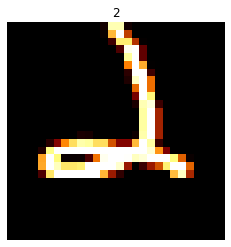

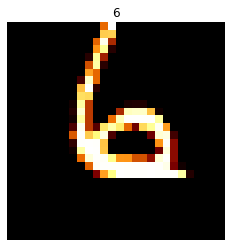

In [22]:
show_digit(X.values[12352], y[12352])
show_digit(X.values[12905], y[12905])

<div style="display: flex; background-color: indigo;" >

#### Conclusion
</div>

La suppression des pixels blancs en début et fin ne semble pas pertinente

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Typage / Encodage
</div>

**Notez que target est une chaîne. La plupart des algorithmes de ML attendent des chiffres, alors allons-y convertir y en entier :**

In [6]:
y = y.astype(np.uint8)

In [24]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [7]:
encoder = OneHotEncoder(sparse=False)
transformed = encoder.fit_transform(pd.DataFrame(y))
transformed.shape

(70000, 10)

In [8]:
transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names())
print("ohe_df:", ohe_df.shape, "y:", y.shape)

ohe_df: (70000, 10) y: (70000,)


In [11]:
#concat with original data
Y_df = pd.concat([y, ohe_df], axis=1)
print("ohe_df:", ohe_df.shape, "y:", y.shape, "data_encode:", Y_df.shape)
Y_df.head()

ohe_df: (70000, 10) y: (70000,) data_encode: (70000, 11)


class  x0_0  x0_1  x0_2  x0_3  x0_4  x0_5  x0_6  x0_7  x0_8  x0_9
0      5   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0
1      0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2      4   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
3      1   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4      9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0

Mais attendez! Vous devez toujours créer une campagne de test et la mettre de côté avant d'inspecter les données de près. Le jeu de données **MNIST** est en fait déjà divisé en un ensemble d'apprentissage (les 60 000 premières images) et un ensemble de tests (les 10 000 dernières images):

In [12]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y_df[:60000], Y_df[60000:]

In [30]:
X_train.shape

(60000, 784)

In [31]:
Y_train

class  class_0  class_1  class_2  class_3  class_4  class_5  class_6  \
0          5      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
1          0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2          4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
3          1      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4          9      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
59995      8      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
59996      3      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
59997      5      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
59998      6      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
59999      8      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       class_7  class_8  class_9  
0          0.0      0.0      0.0  
1          0.0      0.0      0.0  
2          0.0      0.0      0.0  
3          0.0      0.0      0.0  
4          0.0      0.0      1.0  
...        ...      ...      ...  
59995      0.0      1.0      0.0  
59996      0.0      0.0      0.0  
59997      0.0      0.0      0.0  
59998      0.0      0.0      0.0  
59999      0.0      1.0      0.0  

[60000 rows x 11 columns]

In [32]:
Y_test

class  class_0  class_1  class_2  class_3  class_4  class_5  class_6  \
60000      7      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
60001      2      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
60002      1      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
60003      0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
60004      4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
69995      2      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
69996      3      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
69997      4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
69998      5      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
69999      6      0.0      0.0      0.0      0.0      0.0      0.0      1.0   

       class_7  class_8  class_9  
60000      1.0      0.0      0.0  
60001      0.0      0.0      0.0  
60002      0.0      0.0      0.0  
60003      0.0      0.0      0.0  
60004      0.0      0.0      0.0  
...        ...      ...      ...  
69995      0.0      0.0      0.0  
69996      0.0      0.0      0.0  
69997      0.0      0.0      0.0  
69998      0.0      0.0      0.0  
69999      0.0      0.0      0.0  

[10000 rows x 11 columns]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.5. Visualisation
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.5.1. Des images / Chiffres
</div>

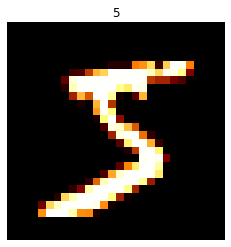

In [13]:
show_digit(X.values[0], y[0])
plt.show()

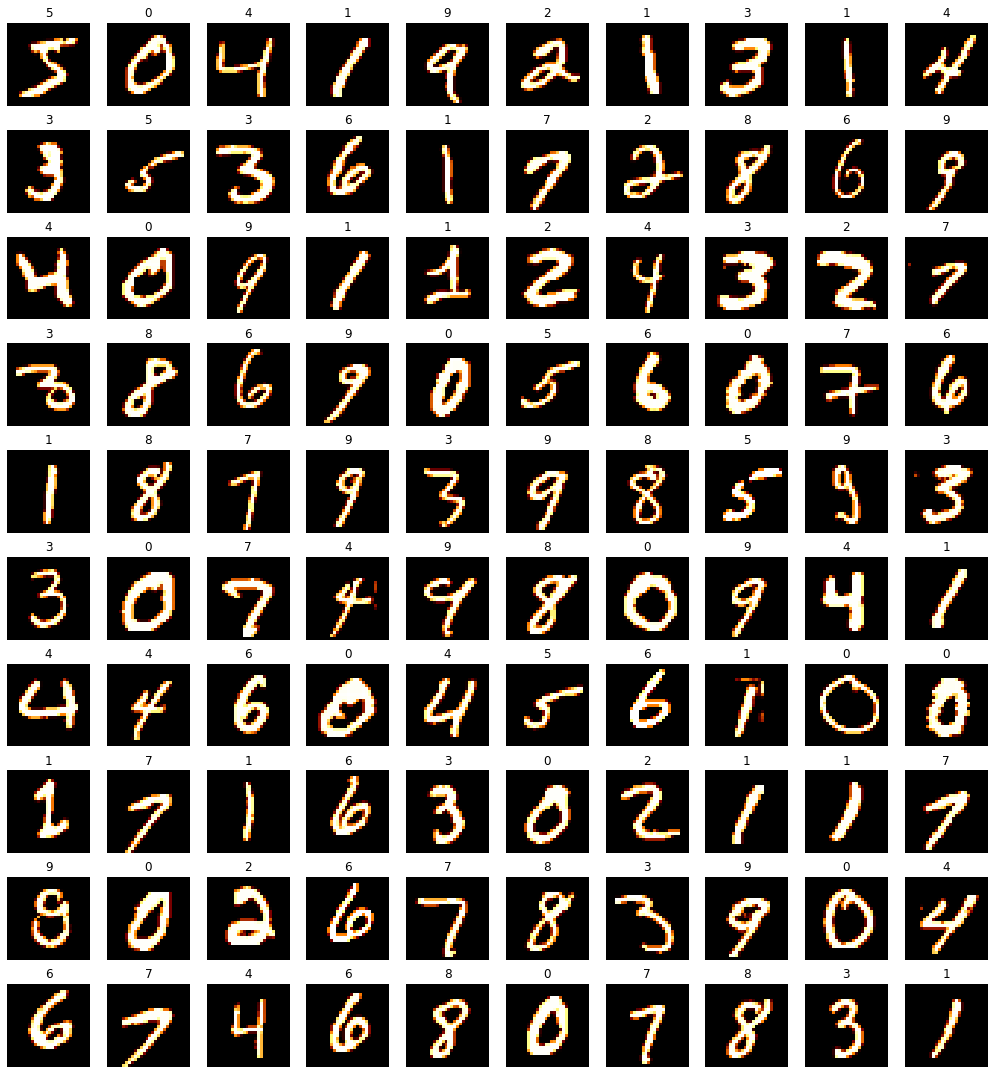

In [34]:
draw_digits(X, y, 100)

<div style="display: flex; background-color: indigo;" >

#### 2.5.2. Représentation graphique possible : via ACP ?
</div>

L'objectif est simplement d'être capable de réduire les données pour les représenter graphiquement

In [14]:
# ACP
pca = PCA(n_components=2)
acp_projection = pca.fit_transform(X_test)

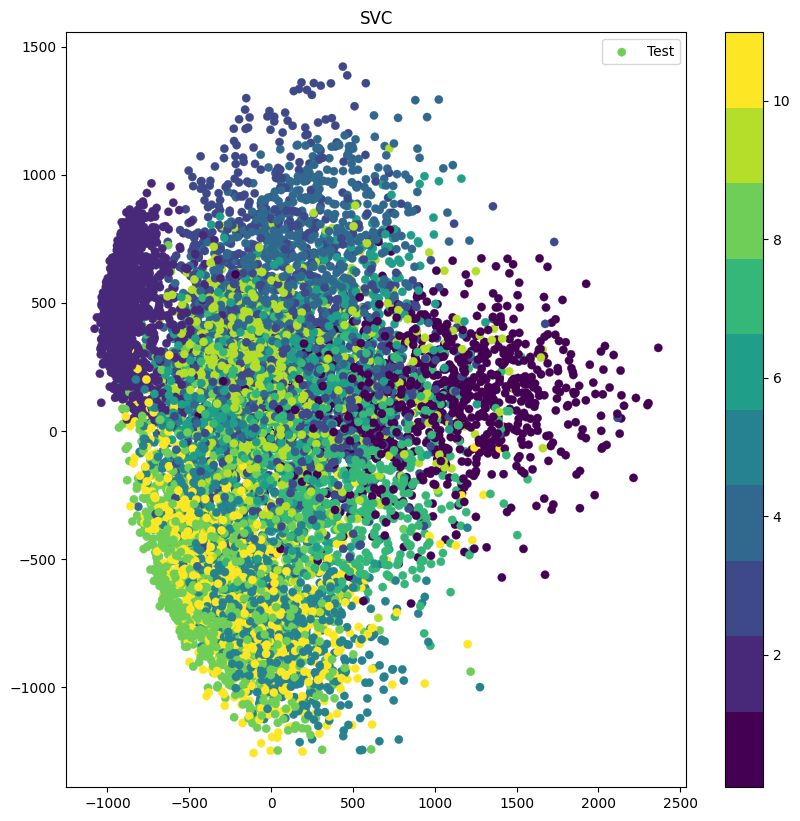

In [36]:
draw_predict(X_test, Y_test['class'], None, title="SVC", projection=acp_projection)

<div style="display: flex; background-color: indigo;" >

#### 2.5.3. Représentation graphique possible : via Isomap ?
</div>

L'objectif est simplement d'être capable de réduire les données pour les représenter graphiquement

In [37]:
from sklearn.manifold import Isomap

In [38]:
iso = Isomap(n_components=2)
projection = iso.fit_transform(X_test)

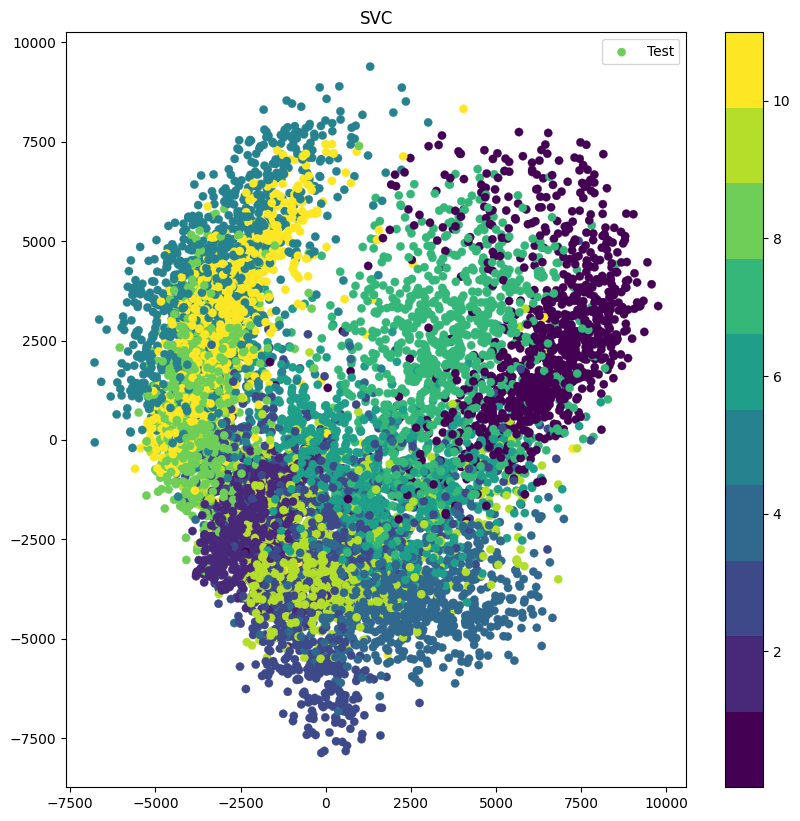

In [39]:
draw_predict(X_test, Y_test['class'], None, title="SVC", projection=projection)

In [ ]:
#PCA
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300, init='random', learning_rate=200.0).fit_transform(X_train)

In [ ]:
import seaborn as sns

In [ ]:
df = pd.DataFrame()
df["y"] = Y_train["class"]
df["comp-1"] = tsne[:, 0]
df["comp-2"] = tsne[:, 1]
rows, cols = df.shape

In [ ]:
figure, axe = color_graph_background()
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")
figure.set_size_inches(10, 10, forward=True)
figure.set_dpi(100)

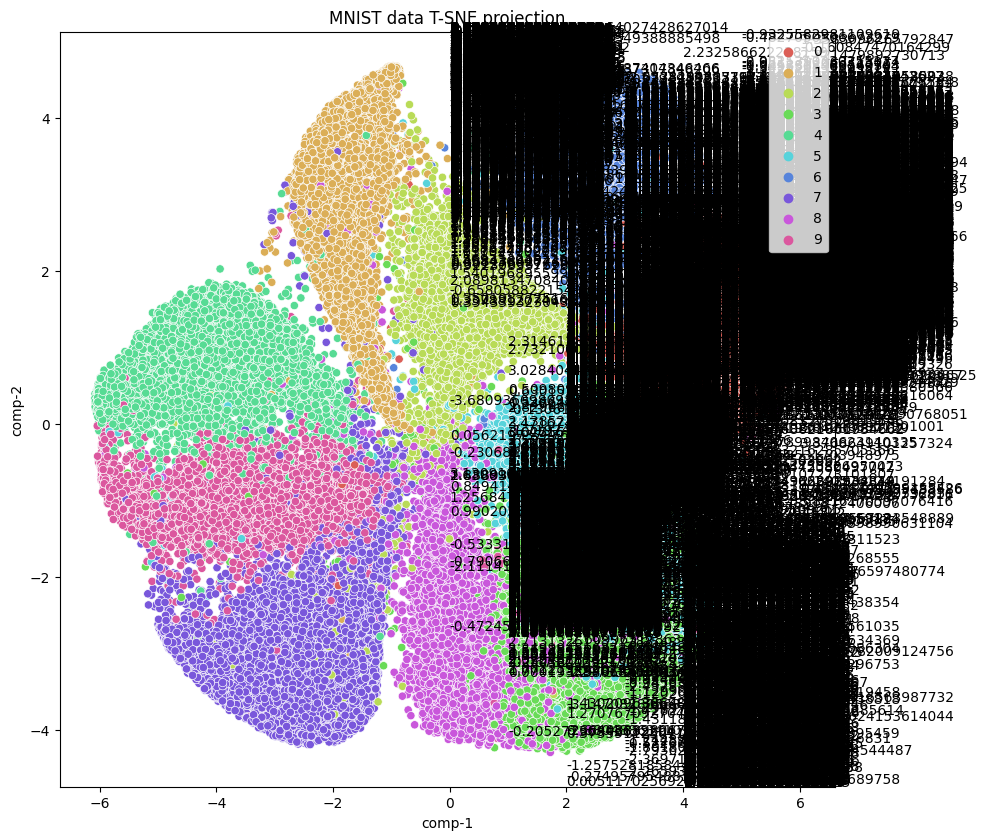

In [46]:
figure, axe = color_graph_background()
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")
for i in range(rows):
    axe.annotate(f'{format(df.iloc[i, 2])}', xy=(df.iloc[i, 0], df.iloc[i, 1])) 
figure.set_size_inches(10, 10, forward=True)
figure.set_dpi(100)

In [47]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [61]:
width = 28

In [70]:
def update_annot(ind):
    i = ind["ind"][0]
    pos = sc.get_offsets()[i]
    annot.xy = (pos[0], pos[1])
    img = X_train[i, :].reshape(width, width)
    imagebox.set_data(img)

In [71]:
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            figure.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                figure.canvas.draw_idle()

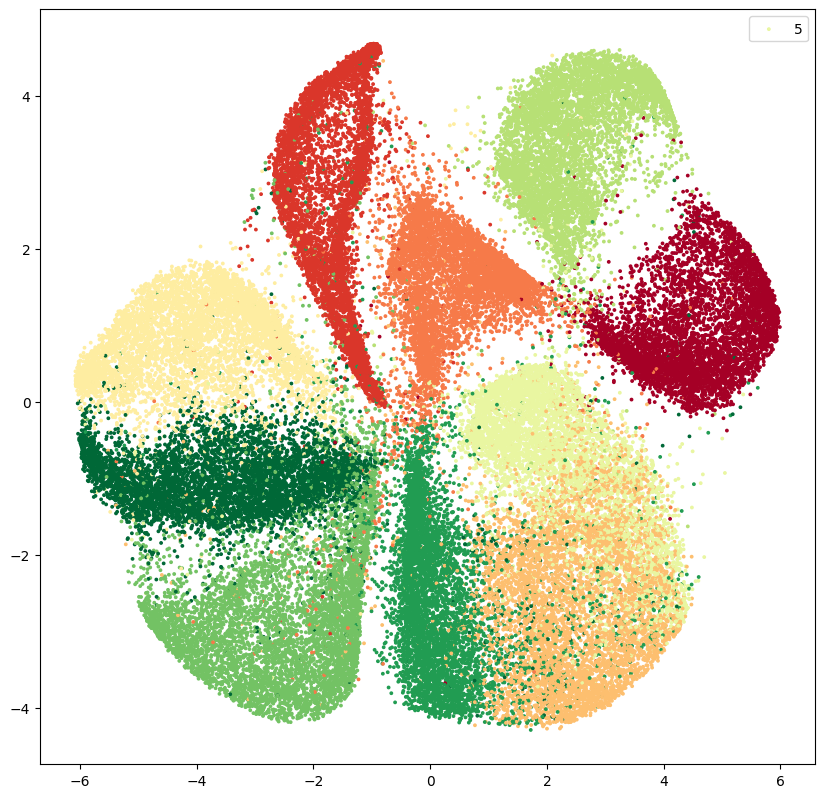

In [75]:
figure, ax = color_graph_background()
img = X_train.iloc[0, :].values.reshape(width, width)
imagebox = OffsetImage(img, zoom=1.0)
imagebox.image.axes = ax

annot = AnnotationBbox(imagebox, xy=(0,0), xybox=(width,width),
                        xycoords="data", boxcoords="offset points", pad=0.5,
                        arrowprops=dict( arrowstyle="->", connectionstyle="arc3,rad=-0.3"))
annot.set_visible(False)
ax.add_artist(annot)
sc = plt.scatter(df["comp-1"], df["comp-2"], c=df["y"], cmap=plt.cm.RdYlGn, s=3)
ax.legend(df["y"].unique())
figure.canvas.mpl_connect("motion_notify_event", hover)
figure.set_size_inches(10, 10, forward=True)
figure.set_dpi(100)
plt.show()

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Problème 1 : Classification binaire
</div>

Simplifions le problème pour l'instant et essayons seulement d'identifier un chiffre, par
exemple, le nombre 5. Ce "5-détecteur" sera un exemple d'un binaire
classificateur, capable de distinguer seulement deux classes, 5 et non-5.


* LogisticRegression
* KNN
* SVC

In [39]:
models_list = { }

In [40]:
Y_train.columns

Index(['class', 'class_0', 'class_1', 'class_2', 'class_3', 'class_4',
       'class_5', 'class_6', 'class_7', 'class_8', 'class_9'],
      dtype='object')

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.2. Test pour 1 chiffre
</div>

In [41]:
y_column_name='class_0'
random_state=0
verbose=0

In [42]:
def get_model_list(random_state=0, n_neighbors=3, verbose=0):
    model_list = {"Logistic":LogisticRegression(random_state=random_state, verbose=verbose),
                  "SVC OVO":svm.SVC(random_state=random_state, verbose=verbose),
                  "KNN":KNeighborsClassifier(n_neighbors=n_neighbors),
                  }
    return model_list

In [43]:
model_list = get_model_list(verbose=verbose)

In [44]:
modeldic, scores = fit_and_test_models(model_list, X_train, Y_train, X_test, Y_test, y_column_name=y_column_name, verbose=verbose, metrics=2)
score_df = pd.DataFrame(scores).set_index("Modeli")
score_df

Class     Model      R2  fit time  fit seconde  \
Modeli                                                               
class_0-Logistic  class_0  Logistic  0.9922  00:00:05     5.683208   
class_0-SVC OVO   class_0   SVC OVO  0.9977  00:01:25    85.339821   
class_0-KNN       class_0       KNN  0.9970  00:00:15    15.372409   

                 metrics time  metrics seconde predict time  predict seconde  \
Modeli                                                                         
class_0-Logistic     00:00:00         0.054996     00:00:00         0.012999   
class_0-SVC OVO      00:00:09         9.031832     00:00:09         9.002543   
class_0-KNN          00:00:30        30.138259     00:00:14        14.824376   

                     MAE  ...  Brier  loss  Log loss  F1 micro  F1 macro  \
Modeli                    ...                                              
class_0-Logistic  0.0078  ...     0.006266  0.026424    0.9922  0.978080   
class_0-SVC OVO   0.0023  ...          NaN       NaN    0.9977  0.993474   
class_0-KNN       0.0030  ...     0.002689  0.055363    0.9970  0.991584   

                  F1 weighted  Recall micro  Recall macro  Recall weighted  \
Modeli                                                                       
class_0-Logistic     0.992225        0.9922      0.981124           0.9922   
class_0-SVC OVO      0.997696        0.9977      0.991903           0.9977   
class_0-KNN          0.997012        0.9970      0.995608           0.9970   

                  Roc auc ovo  Roc auc ovr  
Modeli                                      
class_0-Logistic     0.981124     0.981124  
class_0-SVC OVO      0.991903     0.991903  
class_0-KNN          0.995608     0.995608  

[3 rows x 23 columns]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.3. Test pour tous les chiffres
</div>

In [45]:
# Pour éviter de déclencher la cellule ci-dessous car il est long,
# l'objectif étant toute fois de garder les traces de la dernière exécution
# just to fail

In [46]:
verbose=0
modeldic_full = {}

# ajout des données du modèle y_column_name
col_name_ever_done = False
if modeldic is not None:
    modeldic_full.update(modeldic)
    col_name_ever_done=True
if scores is None:
    scores = defaultdict(list)
    col_name_ever_done=True

for col in Y_train.columns:
    # pour éviter de refaire le traitement déjà réalisé sur un chiffre
    if col != 'class' and (col != y_column_name or not col_name_ever_done):
        if verbose:
            print(col)
        
        modeldic, scores = fit_and_test_models(get_model_list(verbose=verbose), X_train, Y_train, X_test, Y_test, y_column_name=col, scores=scores, verbose=verbose, metrics=2)
        modeldic_full.update(modeldic)
        if verbose:
            print("----------------------------")
score_all_class_df = pd.DataFrame(scores).set_index("Modeli")
score_all_class_df.round(decimals=3)
score_all_class_df

Class     Model      R2  fit time  fit seconde  \
Modeli                                                               
class_0-Logistic  class_0  Logistic  0.9922  00:00:05     5.683208   
class_0-SVC OVO   class_0   SVC OVO  0.9977  00:01:25    85.339821   
class_0-KNN       class_0       KNN  0.9970  00:00:15    15.372409   
class_1-Logistic  class_1  Logistic  0.9933  00:00:05     5.848776   
class_1-SVC OVO   class_1   SVC OVO  0.9981  00:00:44    44.504903   
class_1-KNN       class_1       KNN  0.9959  00:00:15    15.982131   
class_2-Logistic  class_2  Logistic  0.9802  00:00:05     5.720202   
class_2-SVC OVO   class_2   SVC OVO  0.9947  00:04:17   257.839292   
class_2-KNN       class_2       KNN  0.9946  00:00:19    19.192345   
class_3-Logistic  class_3  Logistic  0.9761  00:00:05     5.839089   
class_3-SVC OVO   class_3   SVC OVO  0.9953  00:04:05   245.079533   
class_3-KNN       class_3       KNN  0.9937  00:00:21    21.237329   
class_4-Logistic  class_4  Logistic  0.9834  00:00:07     7.973461   
class_4-SVC OVO   class_4   SVC OVO  0.9954  00:03:25   205.898134   
class_4-KNN       class_4       KNN  0.9945  00:00:20    20.463366   
class_5-Logistic  class_5  Logistic  0.9779  00:00:07     7.401661   
class_5-SVC OVO   class_5   SVC OVO  0.9956  00:03:43   223.055015   
class_5-KNN       class_5       KNN  0.9938  00:00:15    15.950227   
class_6-Logistic  class_6  Logistic  0.9849  00:00:06     6.071104   
class_6-SVC OVO   class_6   SVC OVO  0.9965  00:01:13    73.485286   
class_6-KNN       class_6       KNN  0.9970  00:00:12    12.843654   
class_7-Logistic  class_7  Logistic  0.9833  00:00:05     5.204698   
class_7-SVC OVO   class_7   SVC OVO  0.9929  00:01:40   100.840883   
class_7-KNN       class_7       KNN  0.9927  00:00:19    19.514843   
class_8-Logistic  class_8  Logistic  0.9464  00:00:06     6.520165   
class_8-SVC OVO   class_8   SVC OVO  0.9937  00:04:56   296.231841   
class_8-KNN       class_8       KNN  0.9930  00:00:23    23.792983   
class_9-Logistic  class_9  Logistic  0.9629  00:00:08     8.184660   
class_9-SVC OVO   class_9   SVC OVO  0.9913  00:05:23   323.234199   
class_9-KNN       class_9       KNN  0.9919  00:00:24    24.901757   

                 metrics time  metrics seconde predict time  predict seconde  \
Modeli                                                                         
class_0-Logistic     00:00:00         0.054996     00:00:00         0.012999   
class_0-SVC OVO      00:00:09         9.031832     00:00:09         9.002543   
class_0-KNN          00:00:30        30.138259     00:00:14        14.824376   
class_1-Logistic     00:00:00         0.073124     00:00:00         0.015612   
class_1-SVC OVO      00:00:07         7.477123     00:00:07         7.453256   
class_1-KNN          00:00:32        32.952284     00:00:15        15.564413   
class_2-Logistic     00:00:00         0.065067     00:00:00         0.015996   
class_2-SVC OVO      00:00:22        22.197570     00:00:22        22.169087   
class_2-KNN          00:00:34        34.679318     00:00:17        17.408710   
class_3-Logistic     00:00:00         0.067612     00:00:00         0.016813   
class_3-SVC OVO      00:00:28        28.985177     00:00:28        28.952475   
class_3-KNN          00:00:42        42.648683     00:00:21        21.940121   
class_4-Logistic     00:00:00         0.088972     00:00:00         0.022329   
class_4-SVC OVO      00:00:24        24.073834     00:00:24        24.030717   
class_4-KNN          00:00:40        40.702898     00:00:19        19.997562   
class_5-Logistic     00:00:00         0.090546     00:00:00         0.027359   
class_5-SVC OVO      00:00:20        20.096984     00:00:20        20.060790   
class_5-KNN          00:00:32        32.351284     00:00:16        16.403743   
class_6-Logistic     00:00:00         0.079682     00:00:00         0.017219   
class_6-SVC OVO      00:00:10        10.978075     00:00:10        10.951141   
class_6-KNN        

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.1. Test pour tous les chiffres ensemble
</div>

Test sans paramétrage particulier

In [47]:
verbose=0
y_column_name='class'

In [48]:
modeldic_all, scores = fit_and_test_models(get_model_list(verbose=verbose), X_train, Y_train, X_test, Y_test, y_column_name=y_column_name, scores=scores, verbose=verbose, metrics=2)
modeldic_full.update(modeldic_all)

score_all_class_df = pd.DataFrame(scores).set_index("Modeli")
score_all_class_df.round(decimals=3)
score_all_class_df

Class     Model      R2  fit time  fit seconde  \
Modeli                                                               
class_0-Logistic  class_0  Logistic  0.9922  00:00:05     5.683208   
class_0-SVC OVO   class_0   SVC OVO  0.9977  00:01:25    85.339821   
class_0-KNN       class_0       KNN  0.9970  00:00:15    15.372409   
class_1-Logistic  class_1  Logistic  0.9933  00:00:05     5.848776   
class_1-SVC OVO   class_1   SVC OVO  0.9981  00:00:44    44.504903   
class_1-KNN       class_1       KNN  0.9959  00:00:15    15.982131   
class_2-Logistic  class_2  Logistic  0.9802  00:00:05     5.720202   
class_2-SVC OVO   class_2   SVC OVO  0.9947  00:04:17   257.839292   
class_2-KNN       class_2       KNN  0.9946  00:00:19    19.192345   
class_3-Logistic  class_3  Logistic  0.9761  00:00:05     5.839089   
class_3-SVC OVO   class_3   SVC OVO  0.9953  00:04:05   245.079533   
class_3-KNN       class_3       KNN  0.9937  00:00:21    21.237329   
class_4-Logistic  class_4  Logistic  0.9834  00:00:07     7.973461   
class_4-SVC OVO   class_4   SVC OVO  0.9954  00:03:25   205.898134   
class_4-KNN       class_4       KNN  0.9945  00:00:20    20.463366   
class_5-Logistic  class_5  Logistic  0.9779  00:00:07     7.401661   
class_5-SVC OVO   class_5   SVC OVO  0.9956  00:03:43   223.055015   
class_5-KNN       class_5       KNN  0.9938  00:00:15    15.950227   
class_6-Logistic  class_6  Logistic  0.9849  00:00:06     6.071104   
class_6-SVC OVO   class_6   SVC OVO  0.9965  00:01:13    73.485286   
class_6-KNN       class_6       KNN  0.9970  00:00:12    12.843654   
class_7-Logistic  class_7  Logistic  0.9833  00:00:05     5.204698   
class_7-SVC OVO   class_7   SVC OVO  0.9929  00:01:40   100.840883   
class_7-KNN       class_7       KNN  0.9927  00:00:19    19.514843   
class_8-Logistic  class_8  Logistic  0.9464  00:00:06     6.520165   
class_8-SVC OVO   class_8   SVC OVO  0.9937  00:04:56   296.231841   
class_8-KNN       class_8       KNN  0.9930  00:00:23    23.792983   
class_9-Logistic  class_9  Logistic  0.9629  00:00:08     8.184660   
class_9-SVC OVO   class_9   SVC OVO  0.9913  00:05:23   323.234199   
class_9-KNN       class_9       KNN  0.9919  00:00:24    24.901757   
class-Logistic      class  Logistic  0.9255  00:00:29    29.235419   
class-SVC OVO       class   SVC OVO  0.9792  00:06:34   394.587498   
class-KNN           class       KNN  0.9705  00:00:18    18.824296   

                 metrics time  metrics seconde predict time  predict seconde  \
Modeli                                                                         
class_0-Logistic     00:00:00         0.054996     00:00:00         0.012999   
class_0-SVC OVO      00:00:09         9.031832     00:00:09         9.002543   
class_0-KNN          00:00:30        30.138259     00:00:14        14.824376   
class_1-Logistic     00:00:00         0.073124     00:00:00         0.015612   
class_1-SVC OVO      00:00:07         7.477123     00:00:07         7.453256   
class_1-KNN          00:00:32        32.952284     00:00:15        15.564413   
class_2-Logistic     00:00:00         0.065067     00:00:00         0.015996   
class_2-SVC OVO      00:00:22        22.197570     00:00:22        22.169087   
class_2-KNN          00:00:34        34.679318     00:00:17        17.408710   
class_3-Logistic     00:00:00         0.067612     00:00:00         0.016813   
class_3-SVC OVO      00:00:28        28.985177     00:00:28        28.952475   
class_3-KNN          00:00:42        42.648683     00:00:21        21.940121   
class_4-Logistic     00:00:00         0.088972     00:00:00         0.022329   
class_4-SVC OVO      00:00:24        24.073834     00:00:24        24.030717   
class_4-KNN          00:00:40        40.702898     00:00:19        19.997562   
class_5-Logistic     00:00:00         0.090546     00:00:00         0.027359   
class_5-SVC OVO      00:00:20        20.096984     00:00:20        20.060790   
class_5-KNN          00:00:32        32.351284   

<div style="display: flex; background-color: indigo;" >

#### 4.2.2. R2 et temps d'exécution
</div>

In [63]:
score_all_class_df["Total use seconde"] = score_all_class_df["fit seconde"] + score_all_class_df["predict seconde"]

In [65]:
score_all_class_df["Total use seconde"].head()

Modeli
class_0-Logistic     5.696207
class_0-SVC OVO     94.342364
class_0-KNN         30.196786
class_1-Logistic     5.864387
class_1-SVC OVO     51.958159
Name: Total use seconde, dtype: float64

In [67]:
score_all_class_df["Total use time"] = score_all_class_df["Total use seconde"].apply(lambda x: time.strftime("%H:%M:%S", time.gmtime(x)))

In [76]:
best = score_all_class_df.sort_values(by=["R2", "Total use time"], ascending=False).drop_duplicates('Class', keep='first')

best[['Class', 'Model', 'R2', 'Total use time', 'metrics time',
       'MAE', 'MSE',  'RMSE', 'Mediane AE', 'Brier  loss', 'Log loss', 'F1 micro', 'F1 macro',
       'F1 weighted', 'Recall micro', 'Recall macro', 'Recall weighted',
       'Roc auc ovo', 'Roc auc ovr']]

Class    Model      R2 Total use time metrics time     MAE  \
Modeli                                                                          
class_1-SVC OVO  class_1  SVC OVO  0.9981       00:00:51     00:00:07  0.0019   
class_0-SVC OVO  class_0  SVC OVO  0.9977       00:01:34     00:00:09  0.0023   
class_6-KNN      class_6      KNN  0.9970       00:00:28     00:00:29  0.0030   
class_5-SVC OVO  class_5  SVC OVO  0.9956       00:04:03     00:00:20  0.0044   
class_4-SVC OVO  class_4  SVC OVO  0.9954       00:03:49     00:00:24  0.0046   
class_3-SVC OVO  class_3  SVC OVO  0.9953       00:04:34     00:00:28  0.0047   
class_2-SVC OVO  class_2  SVC OVO  0.9947       00:04:40     00:00:22  0.0053   
class_8-SVC OVO  class_8  SVC OVO  0.9937       00:05:35     00:00:39  0.0063   
class_7-SVC OVO  class_7  SVC OVO  0.9929       00:01:57     00:00:16  0.0071   
class_9-KNN      class_9      KNN  0.9919       00:00:50     00:00:49  0.0081   
class-SVC OVO      class  SVC OVO  0.9792       00:08:14     00:01:39  2.9810   

                    MSE      RMSE  Mediane AE  Brier  loss  Log loss  \
Modeli                                                                 
class_1-SVC OVO  0.0019  0.043589         0.0          NaN       NaN   
class_0-SVC OVO  0.0023  0.047958         0.0          NaN       NaN   
class_6-KNN      0.0030  0.054772         0.0     0.002589  0.045573   
class_5-SVC OVO  0.0044  0.066332         0.0          NaN       NaN   
class_4-SVC OVO  0.0046  0.067823         0.0          NaN       NaN   
class_3-SVC OVO  0.0047  0.068557         0.0          NaN       NaN   
class_2-SVC OVO  0.0053  0.072801         0.0          NaN       NaN   
class_8-SVC OVO  0.0063  0.079373         0.0          NaN       NaN   
class_7-SVC OVO  0.0071  0.084261         0.0          NaN       NaN   
class_9-KNN      0.0081  0.090000         0.0     0.006844  0.102413   
class-SVC OVO    0.4148  0.644050         0.0          NaN       NaN   

                 F1 micro  F1 macro  F1 weighted  Recall micro  Recall macro  \
Modeli                                                                         
class_1-SVC OVO    0.9981  0.995263     0.998097        0.9981      0.993551   
class_0-SVC OVO    0.9977  0.993474     0.997696        0.9977      0.991903   
class_6-KNN        0.9970  0.991350     0.997001        0.9970      0.991808   
class_5-SVC OVO    0.9956  0.986251     0.995566        0.9956      0.978876   
class_4-SVC OVO    0.9954  0.986871     0.995375        0.9954      0.981569   
class_3-SVC OVO    0.9953  0.986927     0.995276        0.9953      0.982006   
class_2-SVC OVO    0.9947  0.985515     0.994669        0.9947      0.979895   
class_8-SVC OVO    0.9937  0.981860     0.993660        0.9937      0.975902   
class_7-SVC OVO    0.9929  0.980460     0.992845        0.9929      0.973219   
class_9-KNN        0.9919  0.977669     0.991898        0.9919      0.977458   
class-SVC OVO      0.9792  0.979130     0.979186        0.9792      0.979092   

                 Recall weighted  Roc auc ovo  Roc auc ovr  
Modeli                                                      
class_1-SVC OVO           0.9981     0.993551     0.993551  
class_0-SVC OVO           0.9977     0.991903     0.991903  
class_6-KNN               0.9970     0.991808     0.991808  
class_5-SVC OVO           0.9956     0.978876     0.978876  
class_4-SVC OVO           0.9954     0.981569     0.981569  
class_3-SVC OVO           0.9953     0.982006     0.982006  
class_2-SVC OVO           0.9947     0.979895     0.979895  
class_8-SVC OVO           0.9937     0.975902     0.975902  
class_7-SVC OVO           0.9929     0.973219     0.973219  
class_9-KNN               0.9919     0.977458     0.977458  
class-SVC OVO             0.9792          NaN          NaN

In [49]:
scores.keys()

dict_keys(['Class', 'Model', 'Modeli', 'R2', 'fit time', 'fit seconde', 'metrics time', 'metrics seconde', 'predict time', 'predict seconde', 'MAE', 'MSE', 'RMSE', 'Mediane AE', 'Brier  loss', 'Log loss', 'F1 micro', 'F1 macro', 'F1 weighted', 'Recall micro', 'Recall macro', 'Recall weighted', 'Roc auc ovo', 'Roc auc ovr'])

In [50]:
model_svc = modeldic_all[y_column_name+"-SVC OVO"]
model_knn = modeldic_all[y_column_name+"-KNN"]
model_logistic = modeldic_all[y_column_name+"-Logistic"]

A ce stade les scores sont déjà très bons.

In [51]:
y_predict_svc = model_svc.predict(X_test)

<Figure size 1296x1080 with 0 Axes>

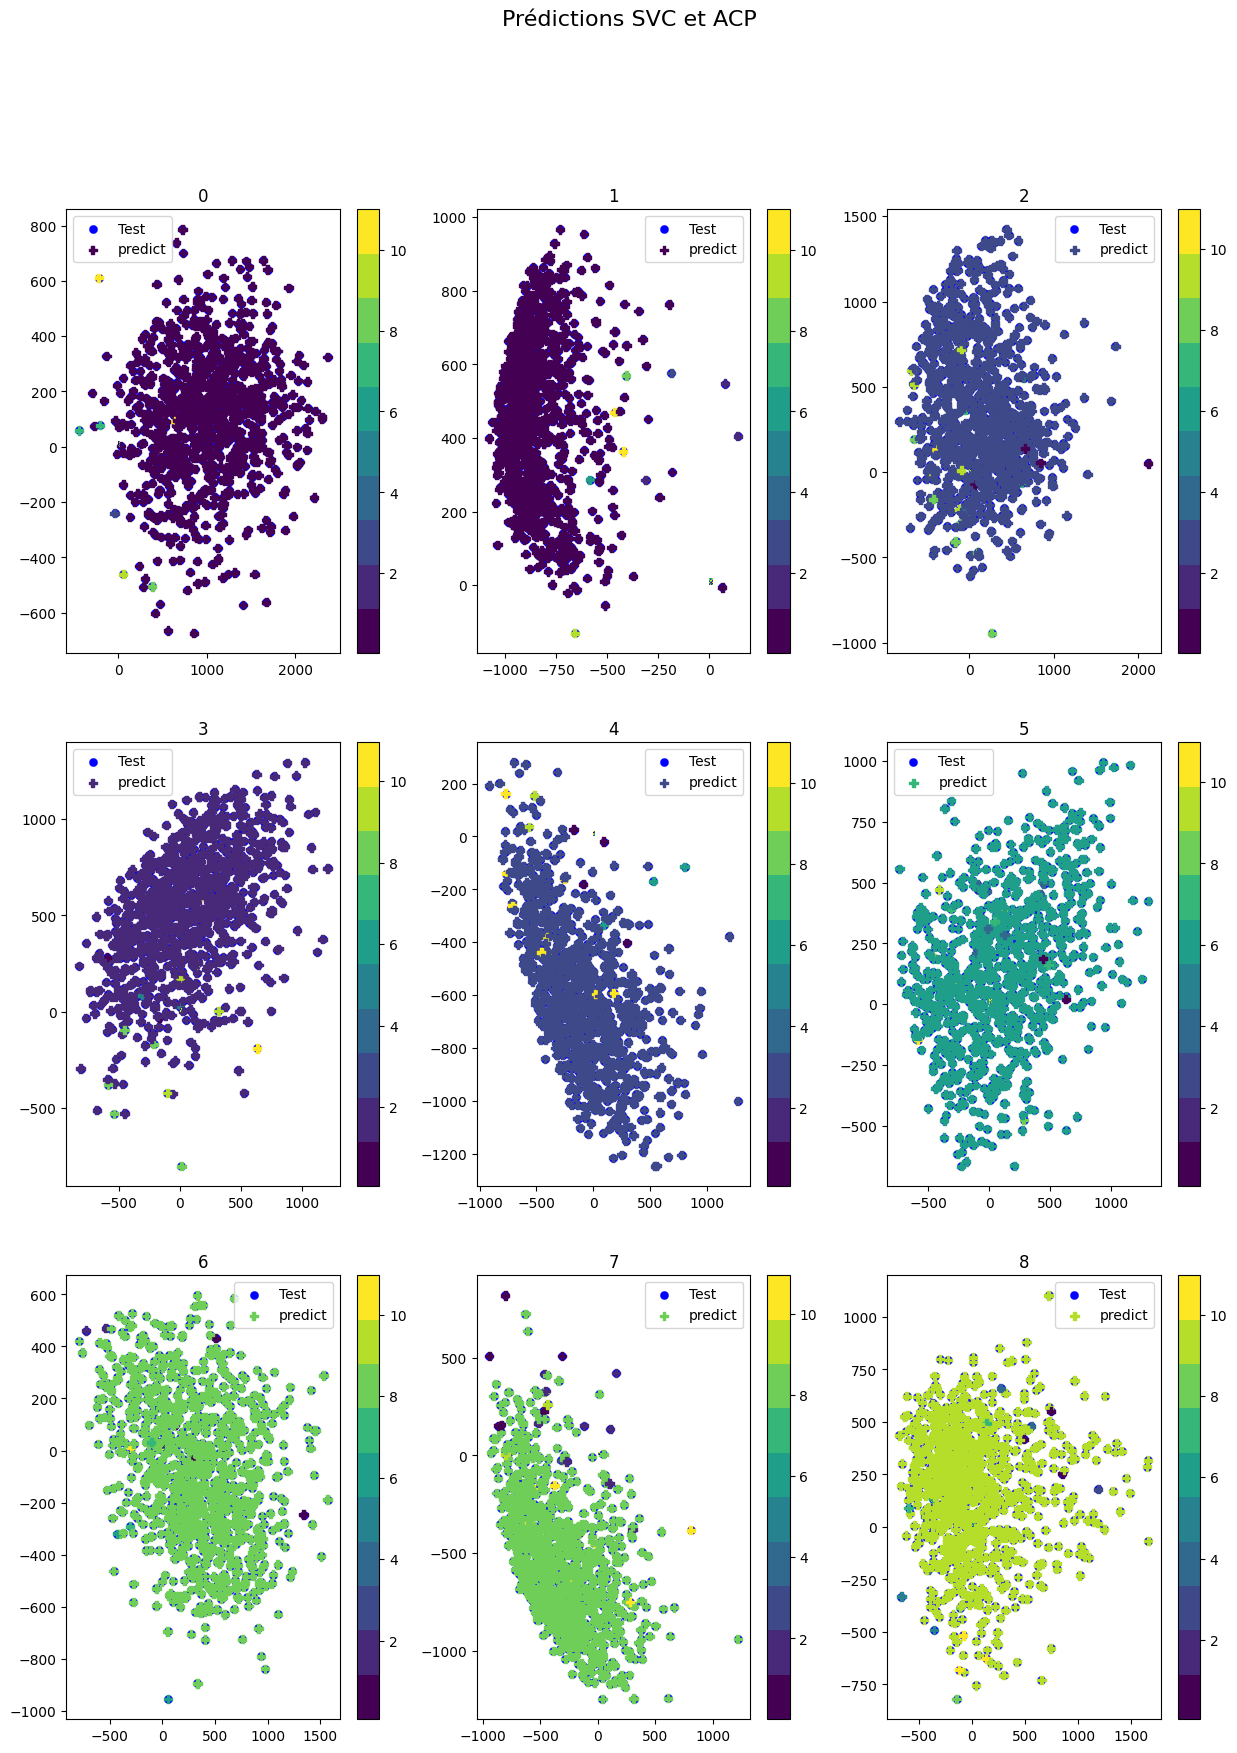

In [52]:
draw_all_predict(X_test, Y_test[y_column_name], y_predict_svc, title="Prédictions SVC et ACP", projection=acp_projection)

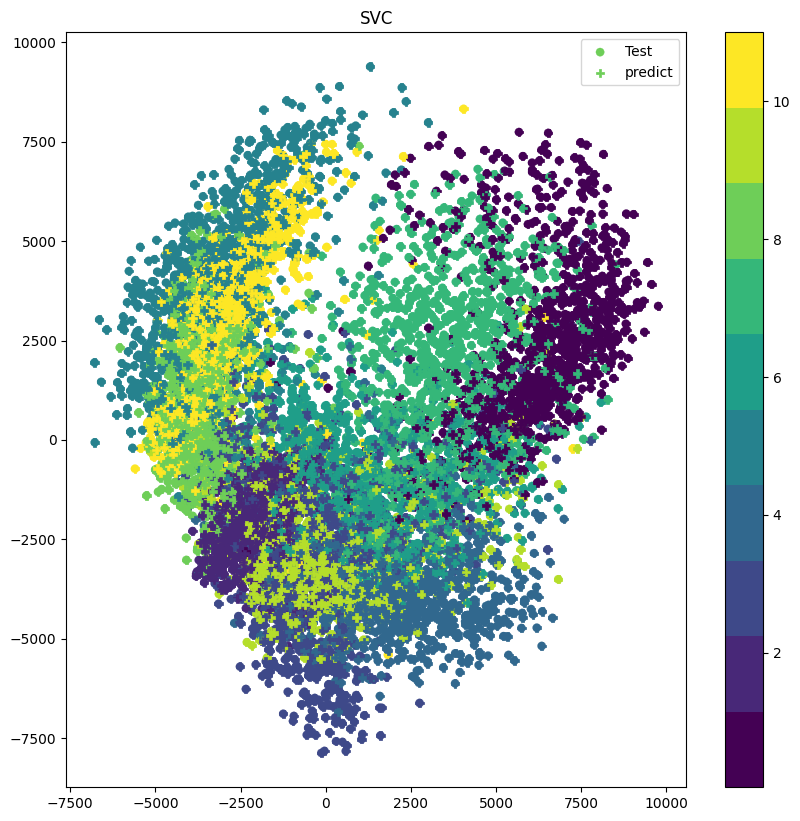

In [53]:
draw_predict(X_test, Y_test[y_column_name], y_predict_svc, title="SVC", projection=projection)

<Figure size 1296x1080 with 0 Axes>

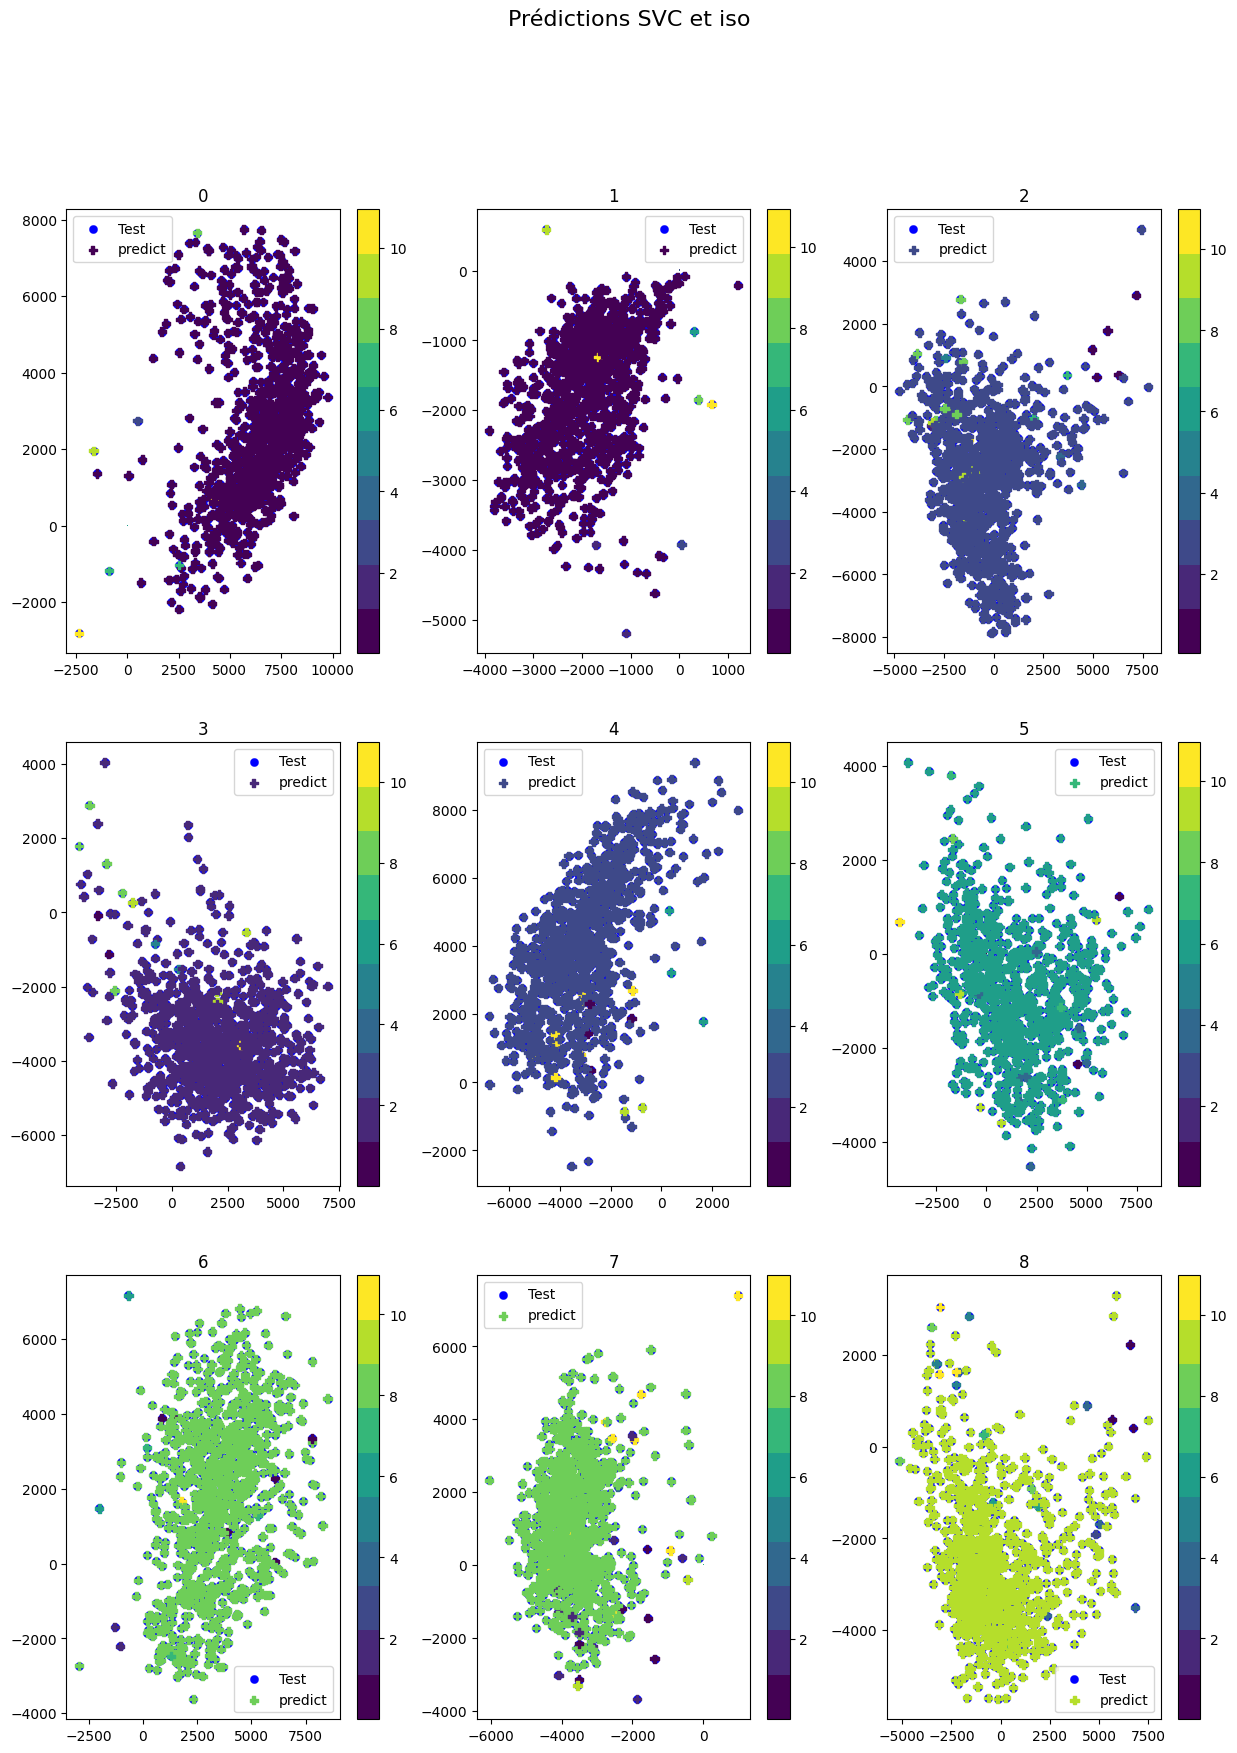

In [54]:
draw_all_predict(X_test, Y_test['class'], y_predict_svc, title="Prédictions SVC et iso", projection=projection)

In [55]:
y_predict_knn = model_knn.predict(X_test)

<div style="display: flex; background-color: indigo;" >

#### 4.1.2. Matrice de confusion
</div

In [56]:
predictions_dic = {"SVC":(model_svc, y_predict_svc), "KNN":(model_knn,y_predict_knn)}

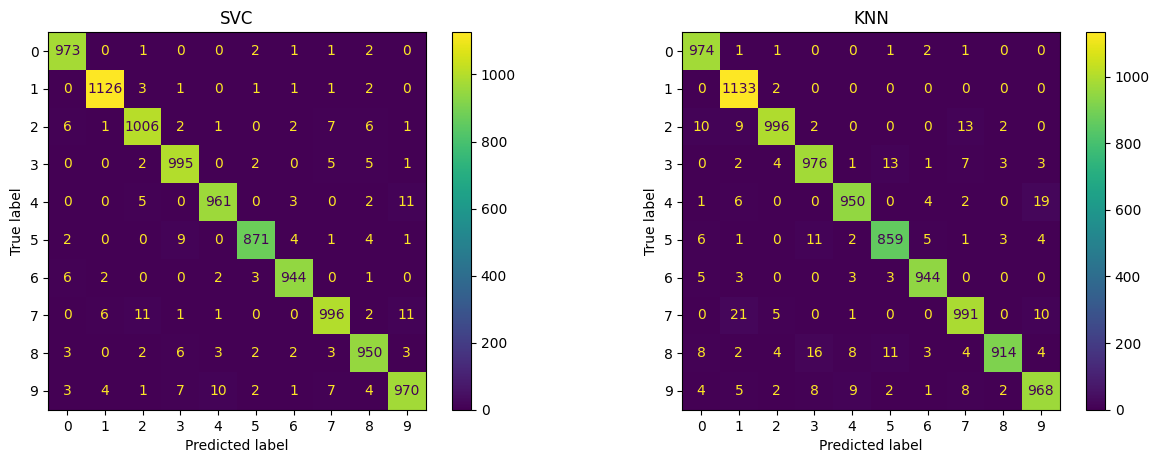

In [57]:
draw_confusion(Y_test[y_column_name], predictions_dic)

<div style="display: flex; background-color: indigo;" >

#### 4.1.4. PrecisionRecall et RocCurveDisplay
</div>

In [58]:
y_score = model_svc.decision_function(X_test)
y_score

array([[ 3.80895496, -0.30212376,  6.19343167, ...,  9.31783975,
         2.75699419,  7.28292338],
       [ 4.18553231,  4.18761078,  9.31442588, ..., -0.31459029,
         5.28430293,  1.69121956],
       [-0.30737409,  9.30985733,  7.22657291, ...,  8.27340301,
         6.2658673 ,  2.74423466],
       ...,
       [ 0.69383538, -0.30657546,  2.71090038, ...,  6.27292798,
         7.30014128,  8.3054091 ],
       [ 5.77650505,  2.74581705,  1.7213734 , ..., -0.29335033,
         8.30520036,  0.70817749],
       [ 6.20908778, -0.30250671,  8.29122329, ...,  0.69621888,
         3.75120338,  2.72899814]])

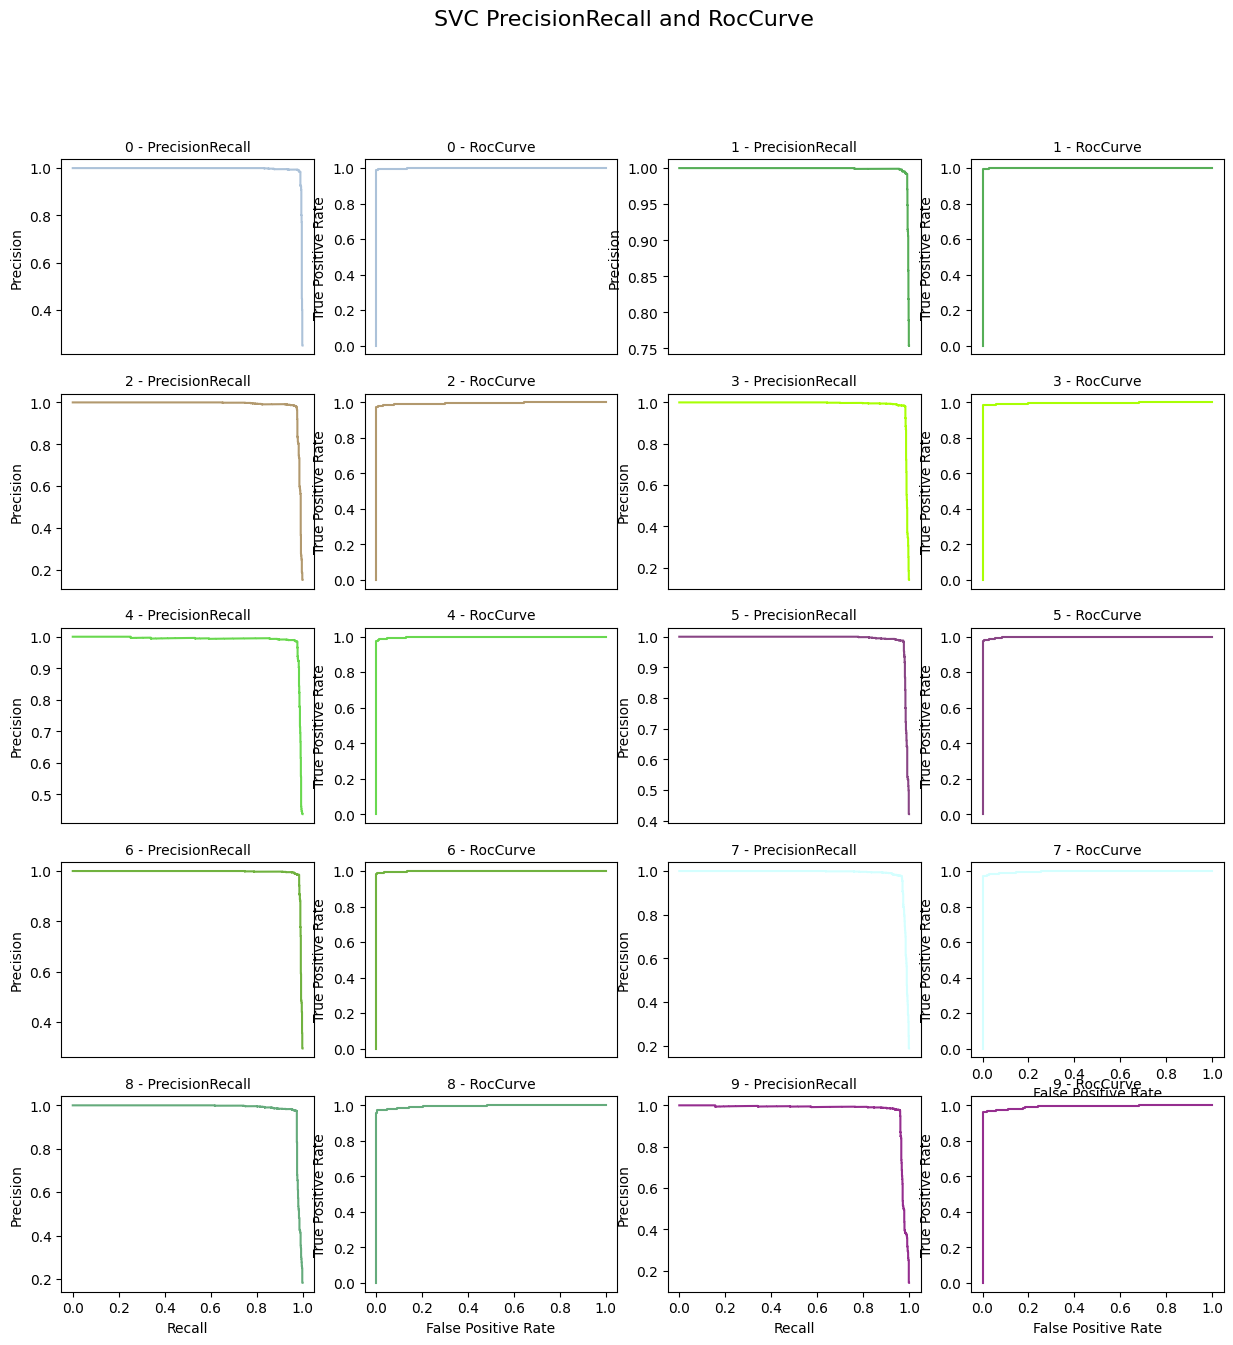

In [59]:
draw_PrecisionRecall_and_RocCurve(model_svc, Y_test, y_score, model_name="SVC")